In [3]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

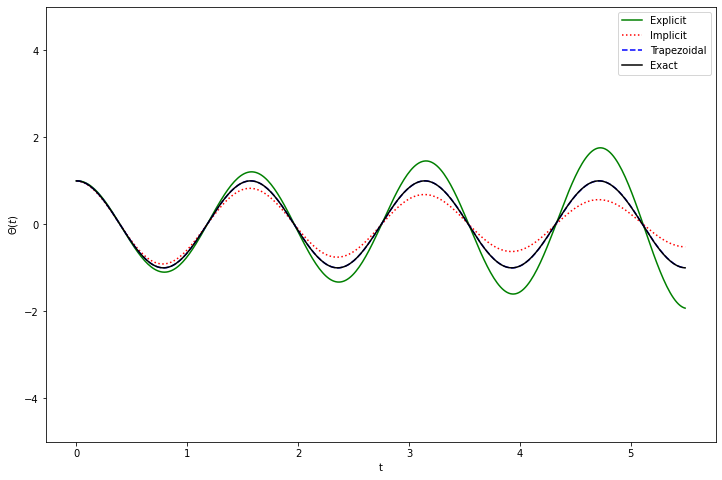

In [14]:
# define step size
h = 0.015
# define numerical grid
t = np.arange(0, 5.5, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

me = np.array([[1, h], 
               [-w**2*h, 1]])
mi = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
mt = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

se = np.zeros((len(t), 2))
si = np.zeros((len(t), 2))
st = np.zeros((len(t), 2))

# do integrations
se[0, :] = s0.T
si[0, :] = s0.T
st[0, :] = s0.T

for j in range(0, len(t)-1):
    se[j+1, :] = np.dot(me,se[j, :])
    si[j+1, :] = np.dot(mi,si[j, :])
    st[j+1, :] = np.dot(mt,st[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,se[:,0],'g')
plt.plot(t,si[:,0],'r:')
plt.plot(t,st[:,0],'b--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-5, 5])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()